In [27]:
import pylab as pl
# this package sets up pretty plots
import seaborn
from scipy.optimize import curve_fit, minimize
import numpy as np
import math

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Chi-square

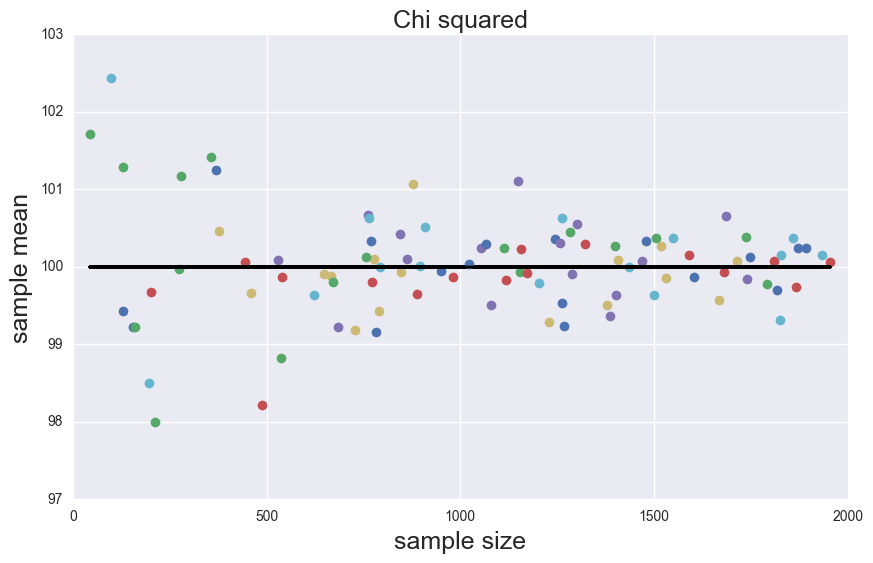

In [4]:
mymean = 100
df = mymean
mysize = np.random.randint(10, 2000, size = 100)
md = {}
md['chisq'] = {}
for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### As the sample size increases, the less diveresed the sample mean values are, which is consistent with the Law of large number that the sample mean is likely to be closer to the population mean in a larger sample.

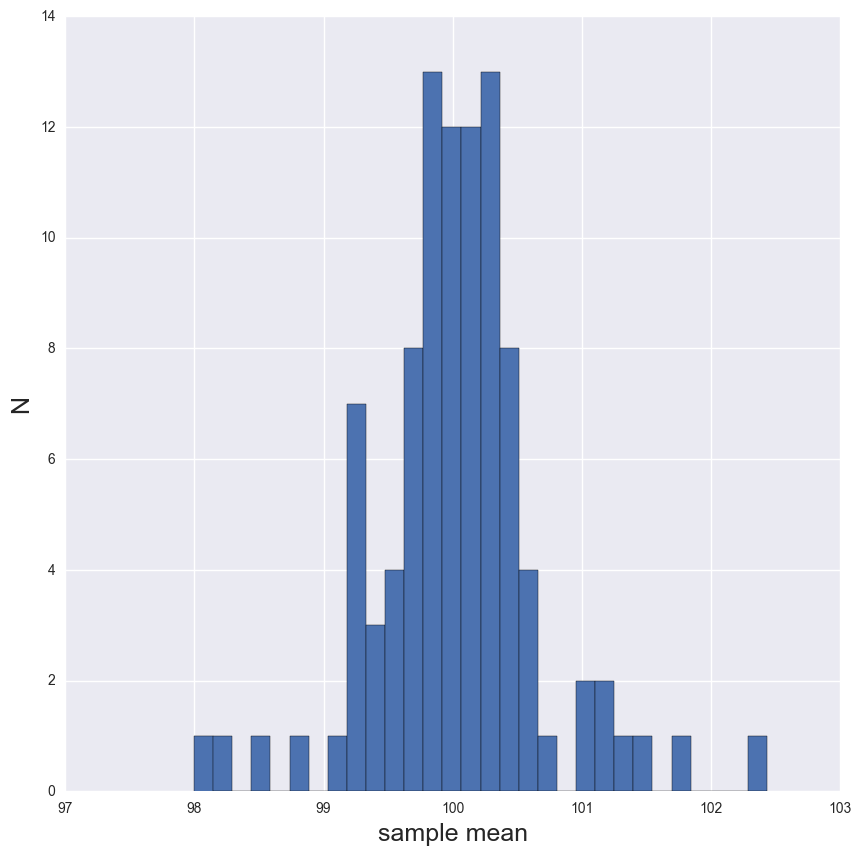

In [5]:
allmeans_chisq = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_chisq,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

## Normal Distribution

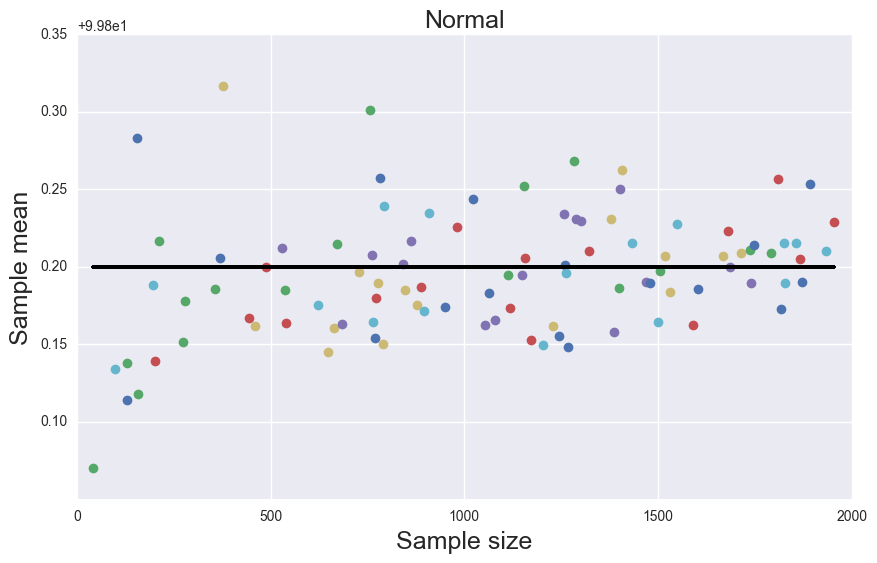

In [6]:
md['normal'] = {}
for n in mysize:
    md['normal'][n] = np.random.normal(loc = df, size = n)

md['normal']['means'] = {}
axnormal_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['normal']:
    if not type(nn) == str:
        md['normal']['means'][nn] = md['normal'][nn].mean()   
        axnormal_mu_n.plot(nn, md['normal']['means'][nn], 'o')
        axnormal_mu_n.set_xlabel('Sample size', fontsize=18)
        axnormal_mu_n.set_ylabel('Sample mean', fontsize=18)
        axnormal_mu_n.set_title('Normal', fontsize=18)
        axnormal_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### In the case normal distribution, the standard deviation of sample mean values is large when the sample sizes are small. The larger the sample size is, the closer the sample mean is to the population mean, which is 100

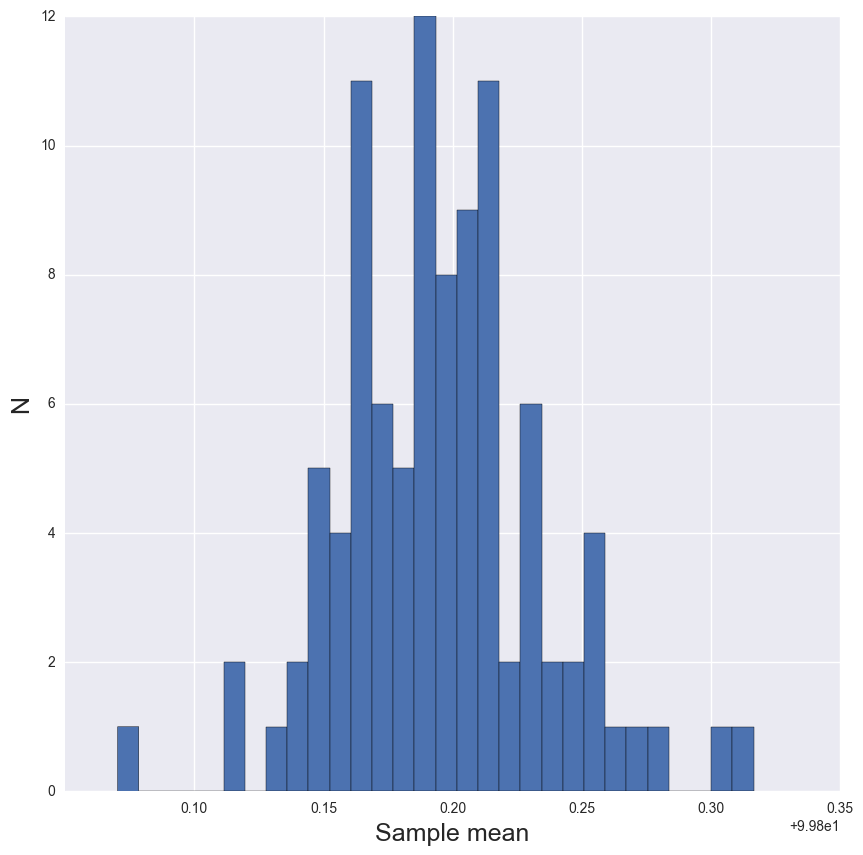

In [7]:
allmeans_normal = list(md['normal']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_normal,bins=30)
pl.xlabel('Sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

## Poisson Distribution

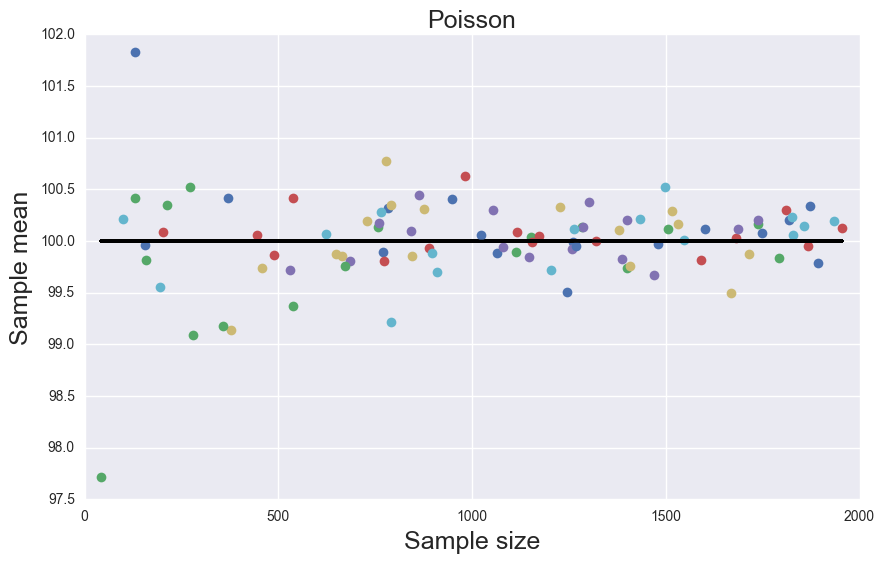

In [8]:
md['poisson'] = {}
for n in mysize:
    md['poisson'][n] = np.random.poisson(lam = df, size = n)

md['poisson']['means'] = {}
axnormal_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['poisson']:
    if not type(nn) == str:
        md['poisson']['means'][nn] = md['poisson'][nn].mean()   
        axnormal_mu_n.plot(nn, md['poisson']['means'][nn], 'o')
        axnormal_mu_n.set_xlabel('Sample size', fontsize=18)
        axnormal_mu_n.set_ylabel('Sample mean', fontsize=18)
        axnormal_mu_n.set_title('Poisson', fontsize=18)
        axnormal_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### For the Poisson distribution, the sample mean values are more clustered around the population mean (100) when the sample sizes are large ranging from 1500 to 2000, demonstrating the Law of large number

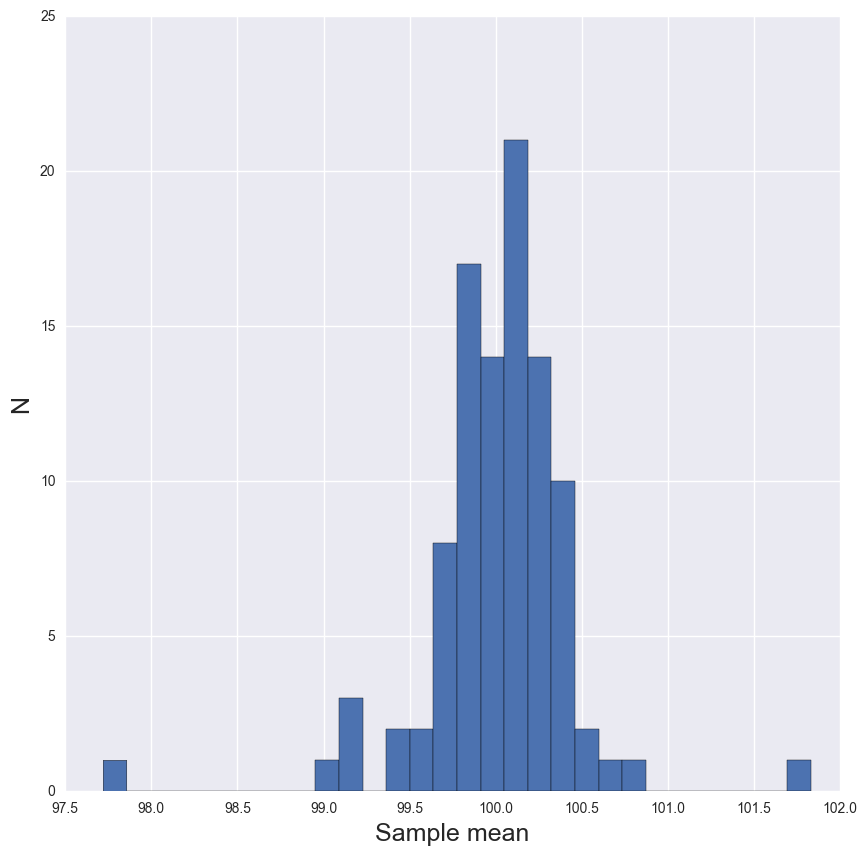

In [9]:
allmeans_poisson = list(md['poisson']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_poisson,bins=30)
pl.xlabel('Sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

## Binomial Distribution

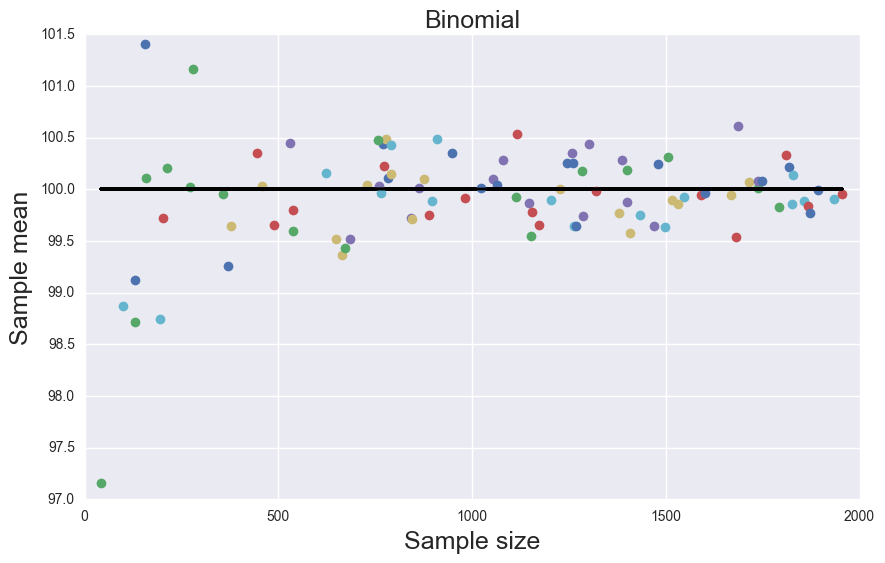

In [10]:
md['binomial'] = {}
for n in mysize:
    md['binomial'][n] = np.random.binomial(1000, 0.1, size = n)

md['binomial']['means'] = {}
axnormal_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['binomial']:
    if not type(nn) == str:
        md['binomial']['means'][nn] = md['binomial'][nn].mean()   
        axnormal_mu_n.plot(nn, md['binomial']['means'][nn], 'o')
        axnormal_mu_n.set_xlabel('Sample size', fontsize=18)
        axnormal_mu_n.set_ylabel('Sample mean', fontsize=18)
        axnormal_mu_n.set_title('Binomial', fontsize=18)
        axnormal_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### For the Binomial distribution, the sample mean values are more scattered compared to other distributions' graphs. However, the Law of large number still applies to this ditribution as we see the mean value approach the population mean value, 100 as the sample size gets larger.

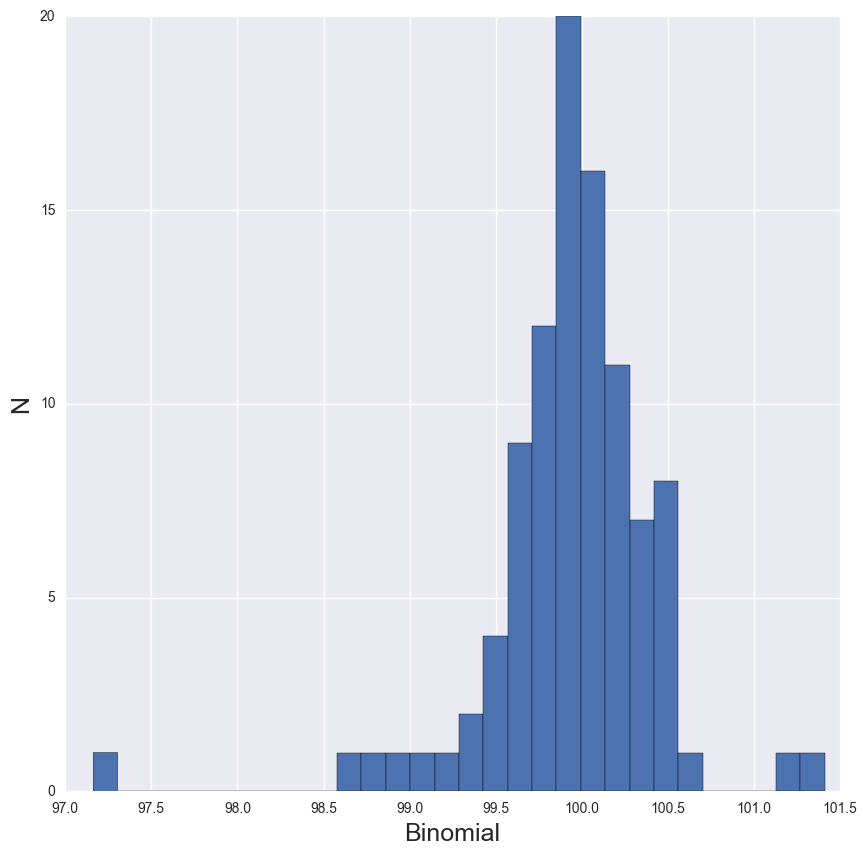

In [11]:
allmeans_binomial = list(md['binomial']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_binomial,bins=30)
pl.xlabel('Binomial', fontsize = 18)
pl.ylabel('N', fontsize = 18)

## Exponential Distribution

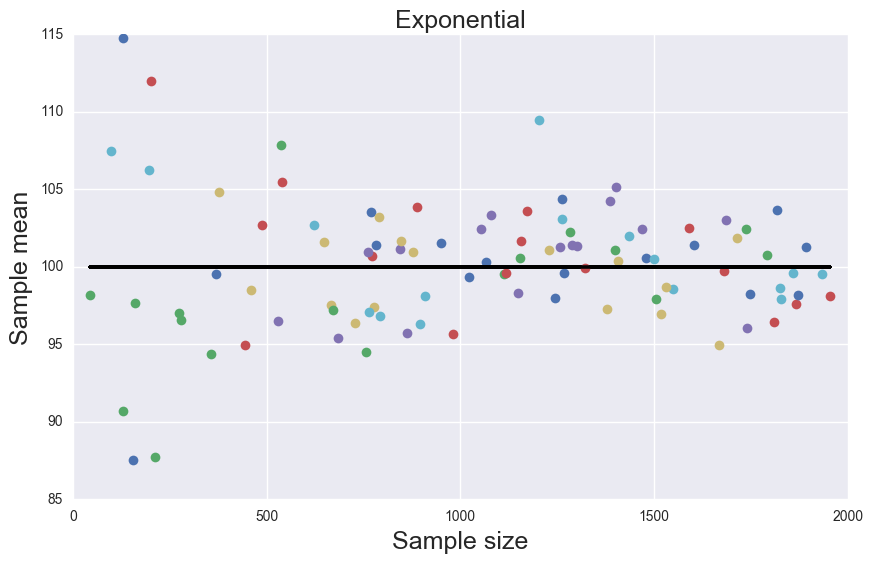

In [12]:
md['exponential'] = {}
for n in mysize:
    md['exponential'][n] = np.random.exponential(scale = 100, size = n)

md['exponential']['means'] = {}
axnormal_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['exponential']:
    if not type(nn) == str:
        md['exponential']['means'][nn] = md['exponential'][nn].mean()   
        axnormal_mu_n.plot(nn, md['exponential']['means'][nn], 'o')
        axnormal_mu_n.set_xlabel('Sample size', fontsize=18)
        axnormal_mu_n.set_ylabel('Sample mean', fontsize=18)
        axnormal_mu_n.set_title('Exponential', fontsize=18)
        axnormal_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

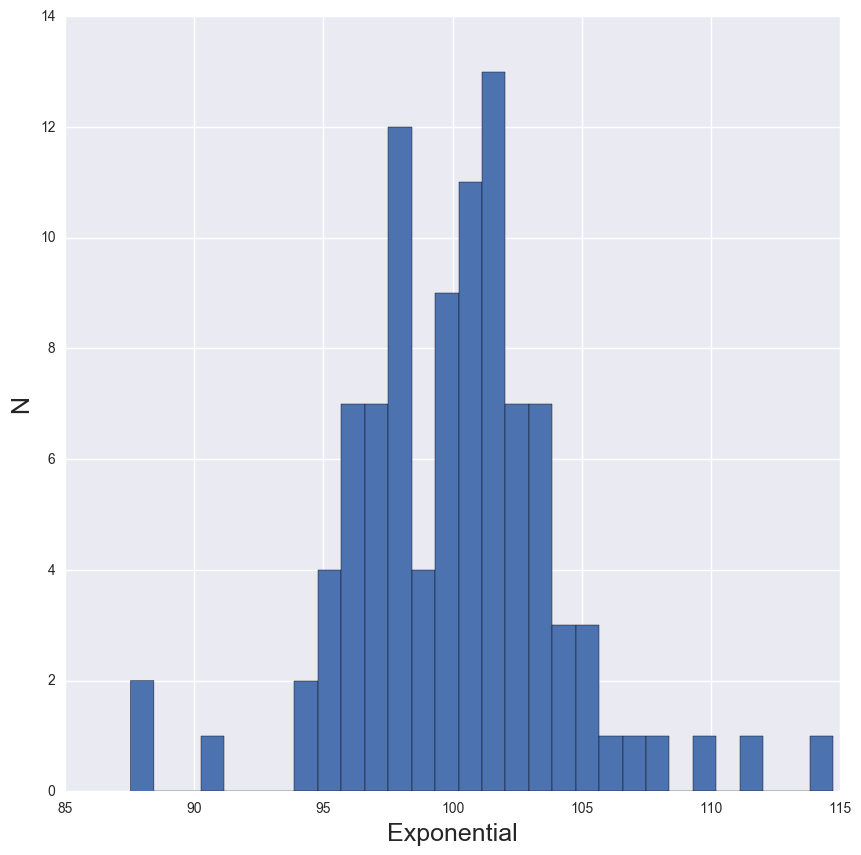

In [13]:
allmeans_exponential = list(md['exponential']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_exponential,bins=30)
pl.xlabel('Exponential', fontsize = 18)
pl.ylabel('N', fontsize = 18)

## Plot the distributions of all sample means

In [18]:
allmeans = list(md['normal']['means'].values()) + \
list(md['poisson']['means'].values())+ \
list(md['binomial']['means'].values())+ \
list(md['chisq']['means'].values())+\
list(md['exponential']['means'].values())
#Cannot use append use np.concatenate([list1, list2,...])

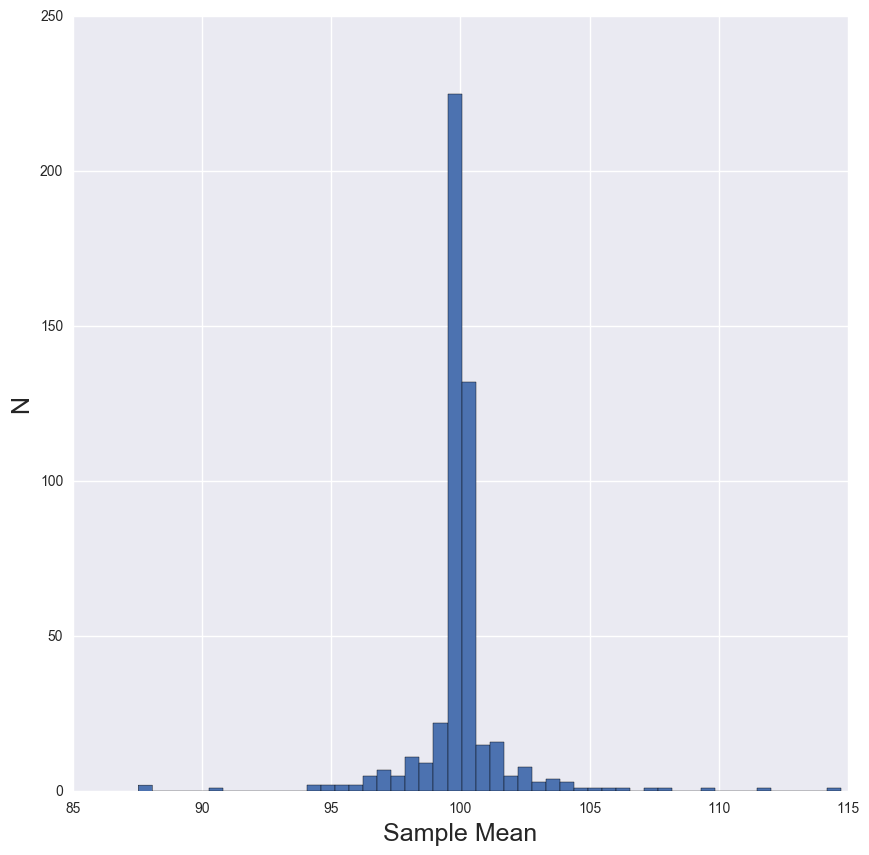

In [19]:
pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=50)
pl.xlabel('Sample Mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

## Extra Credit
For this part, I used the codes from the webiste http://www.bdnyc.org/2012/05/fitting-a-gaussian-to-your-data/ for references.

In [68]:
from scipy.stats import norm

In [69]:
(mu,sigma) = norm.fit(allmeans)

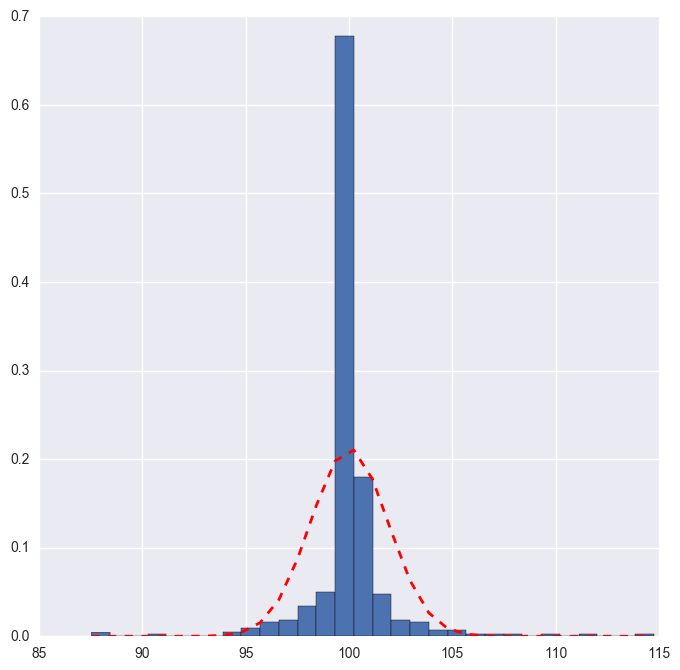

In [85]:
pl.figure(figsize=(8, 8))
n,bins,patches=plt.hist(allmeans,30,normed=1)
y = mlab.normpdf(bins,mu,sigma)
plt.plot(bins,y,'r--',linewidth=2)